In [87]:
import torch

In [88]:
unitialized = torch.Tensor(3,2)
rand_initialized = torch.rand(3,2)

In [89]:
unitialized

tensor([[-1.5968e+16,  3.0934e-41],
        [ 1.6994e-01,  0.0000e+00],
        [        nan,  2.3510e-38]])

In [90]:
rand_initialized

tensor([[0.9371, 0.6556],
        [0.3138, 0.1980],
        [0.4162, 0.2843]])

In [91]:
ones = torch.ones(3,2)
ones.shape

torch.Size([3, 2])

In [92]:
a = torch.rand(3,2)
b = torch.rand(2,4)
c = a@b

c.shape

torch.Size([3, 4])

squeeze remove dimensions that are 1

In [93]:
a = torch.rand(3,1,5,1)
a.shape

torch.Size([3, 1, 5, 1])

In [94]:
a = a.squeeze()
a.shape

torch.Size([3, 5])

In [95]:
import matplotlib.pyplot as plt
import numpy as np

In [96]:
x = torch.linspace(0,np.pi*2,steps = 100)
y = torch.sin(x)

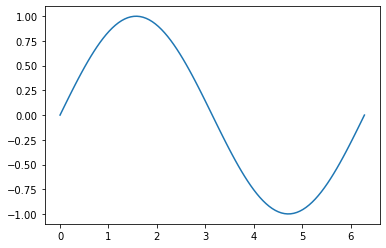

In [97]:
plt.plot(x,y)

##Differentiation

In [98]:
x = torch.tensor(2.0,requires_grad=True)
y = x**2
y.backward()
x.grad

tensor(4.)

In [99]:
x = torch.tensor(2.,requires_grad = True)
z = x**2 +2*x + 1
z.backward()
x.grad

tensor(6.)

##Partial Derivatives

In [100]:
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

f = x1**2 + x2**2

f.backward()
x1.grad, x2.grad

(tensor(4.), tensor(6.))

##Simple Datasets

In [101]:
from torch.utils.data import Dataset

In [102]:
class toy_set(Dataset):
  def __init__(self,length = 100, transform = None):
    self.x = 2*torch.ones(length,2)
    self.y = torch.ones(length,1)
    self.len = length
    self.transform = transform
  
  def __getitem__(self, index):
    sample = self.x[index],self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.len

#create a transform
class add_mul(object):
  def __init__(self,addx = 1, muly = 1):
    self.addx = addx
    self.muly = muly

  def __call__(self,sample):
    sample = list(sample) #tuple to list
    sample[0] +=  self.addx
    sample[1] *=  self.muly
    return sample

In [103]:
a_m = add_mul()
data = toy_set(transform=a_m)
data[1]

[tensor([3., 3.]), tensor([1.])]

##Apply multiple transforms

In [104]:
from torchvision import transforms

In [105]:
#create another tranfrom
class mult(object):
  def __init__(self,mul = 100) -> None:
    self.mul = mul
  
  def __call__(self,sample):
    sample = list(sample)
    sample[0] *= self.mul
    sample[1] *= self.mul
    return sample

In [106]:
a_m = add_mul()
mult = mult()

compose = transforms.Compose([a_m,mult])

In [107]:
dataset = toy_set(transform = compose)

In [108]:
dataset[1]

[tensor([300., 300.]), tensor([100.])]

##Large Dataset

In [109]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P ./data

--2022-03-01 15:21:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘./data/img.tar.gz.1’

img.tar.gz.1        100%[===================>]  49.28K  --.-KB/s    in 0s      

2022-03-01 15:21:18 (223 MB/s) - ‘./data/img.tar.gz.1’ saved [50460/50460]



In [110]:
!tar -xf ./data/img.tar.gz 

In [111]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2022-03-01 15:21:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv.1’

index.csv.1         100%[===================>]   1.60M  --.-KB/s    in 0.01s   

2022-03-01 15:21:19 (140 MB/s) - ‘index.csv.1’ saved [1680905/1680905]



In [112]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [113]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [114]:
data_name = pd.read_csv("/content/index.csv")
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [115]:
data_name.iloc[0,:]

category          Ankle boot
image       img/fashion0.png
Name: 0, dtype: object

In [116]:
image_name = data_name.iloc[1,1]
image_name

'img/fashion1.png'

In [117]:
image_path = os.path.join("/content/",image_name)
image_path

'/content/img/fashion1.png'

plot the image

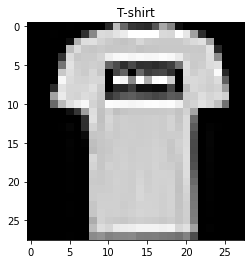

In [118]:
image = Image.open(image_path)
plt.imshow(image, cmap= "gray")
plt.title(data_name.iloc[1,0])
plt.show()

In [119]:
from torch.utils.data import Dataset

class Dataset(Dataset):

  def __init__(self,csv_dir ="/content/index.csv" ,data_dir = "/content", transform = None):
    self.data_dir = data_dir
    self.data_name = pd.read_csv(csv_dir)
    self.transform = transform
    self.len = len(data_name)

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    path = self.data_name.iloc[index,1]
    x = os.path.join(self.data_dir,path)
    print(x)
    image = Image.open(x)
    y = self.data_name.iloc[index,0]

    if self.transform:
      image = self.transform(image)

    return image,y

In [120]:
dataset = Dataset()

/content/img/fashion0.png


(<matplotlib.image.AxesImage at 0x7fae582b8ad0>, 'Ankle boot')

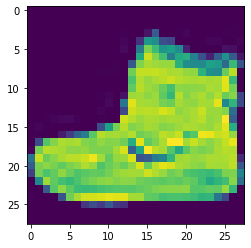

In [121]:
img, y = dataset[0]
plt.imshow(img), y

##TorchVision Transforms

In [122]:
import torchvision.transforms as transforms

In [123]:
#CenterCrop -> gets the central 20x20 pixepls (resizes)
compose = transforms.Compose([transforms.CenterCrop(20),transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_dir="/content/index.csv" , data_dir="/content",transform=compose)
print("The shape of the first element tensor: ", dataset[0][0].shape)

/content/img/fashion0.png
The shape of the first element tensor:  torch.Size([1, 20, 20])


/content/img/fashion14.png


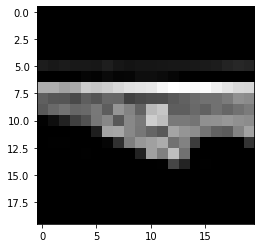

In [124]:
plt.imshow(dataset[14][0].squeeze(), cmap = "gray")

#Linear Regression

In [125]:
w = torch.tensor(2.,requires_grad=True)
b = torch.tensor(-1.,requires_grad=True)

In [126]:
def forward(x,w,b):
  return w*x + b

In [127]:
x = torch.tensor(1)
yhat = forward(x,w,b)
yhat

tensor(1., grad_fn=<AddBackward0>)

In [128]:
w.shape,x.shape,b.shape

(torch.Size([]), torch.Size([]), torch.Size([]))

In [129]:
x = torch.tensor([1,3])
yhat = forward(x,w,b)
yhat

tensor([1., 5.], grad_fn=<AddBackward0>)

##Class Linear

In [130]:
from torch.nn import Linear

In [131]:
torch.manual_seed(1)

In [132]:
lr = Linear(in_features=1, out_features=1,bias = True)
list(lr.parameters()) #contains parameters

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [133]:
#another way to get params
lr.state_dict()

OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])

In [134]:
#another way to get the parameters
lr.weight, lr.bias

(Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True))

In [135]:
#make the prediction
x = torch.tensor([1.])
yhat = lr(x)
yhat

tensor([0.0739], grad_fn=<AddBackward0>)

In [136]:
#make the prediction
x = torch.tensor([[1.],[3]])
yhat = lr(x)
yhat

tensor([[0.0739],
        [1.1044]], grad_fn=<AddmmBackward0>)

##Build custom Linear Regression

In [137]:
from torch import nn

class LR(nn.Module):
  
  def __init__(self, input_size, output_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    out = self.linear(x)
    return out 

In [138]:
lr = LR(1,1)
x = torch.tensor([[3.]])
lr(x)

tensor([[-0.1122]], grad_fn=<AddmmBackward0>)

In [139]:
lr = LR(1,1)
x = torch.tensor([[3.],[2.4],[1.2]])
lr(x)

tensor([[-2.2246],
        [-1.6597],
        [-0.5300]], grad_fn=<AddmmBackward0>)

##Implement Gradient Descent

In [146]:
w = torch.tensor(-10.,requires_grad = True)
X = torch.arange(-3,3,0.1).view(-1,1)
f = X*-3

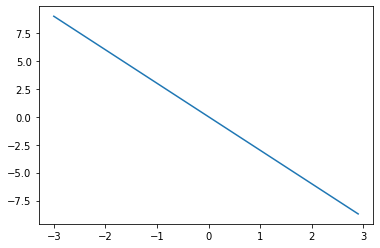

In [147]:
plt.plot(X,f)

In [163]:
Y = f + (0.1*torch.randn(X.size()))

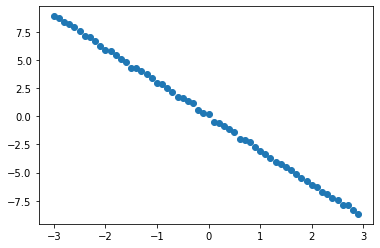

In [164]:
plt.scatter(X.numpy(),Y.numpy())
plt.show()

In [173]:
X.size(),Y.size()
forward(X).size()

torch.Size([3, 1])

In [174]:
def forward(X):
  return w*X

def loss(X,Y):
  yhat = forward(X)
  return torch.mean((yhat-Y)**2)

In [195]:
lr = 0.1
cost = []

for epoch in range(100):
  l = loss(X,Y)
  l.backward()
  
  w.data = w.data - w.grad.data
  w.grad.data.zero_()

  cost.append(l.item())

In [187]:
len(cost)

1000